In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [118]:
df = pd.read_csv('../kp_classify.csv')
df.head()

,match,image_tag,pos,point_x,point_y,size,angle,response,octave
0,0,S6286S09,right-side,69,111,31.000000,316.509583,0.000998,0
1,0,S6328S00,right-side,48,141,44.640003,26.538267,0.001446,2
2,0,S6286S09,right-side,71,115,31.000000,331.395935,0.000316,0
3,0,S6328S00,right-side,36,90,31.000000,358.085480,0.000497,0
4,0,S6286S09,right-side,85,97,31.000000,113.918335,0.000223,0


In [119]:
df.shape

(674642, 9)

In [120]:
df.shape[0]

674642

In [121]:
df_reduced = df.sample(n=df.shape[0], random_state=42).reset_index(drop=True)

In [122]:
heatmap_data_size = df_reduced.pivot_table(index='point_y', columns='point_x', values='size', aggfunc='mean')
heatmap_data_class = df_reduced.pivot_table(index='point_y', columns='point_x', values='match', aggfunc='mean')

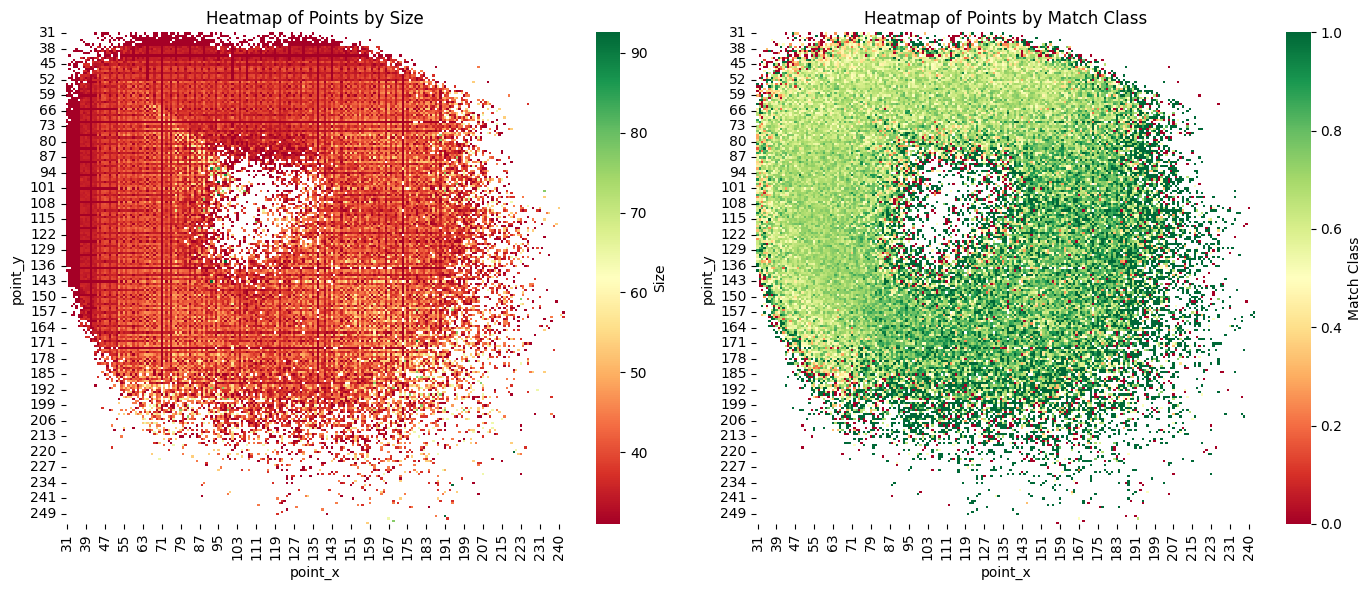

In [123]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(heatmap_data_size, cmap="RdYlGn", annot=False, fmt=".2f", cbar_kws={'label': 'Size'}, ax=ax1)
ax1.set_title('Heatmap of Points by Size')
ax1.set_xlabel('point_x')
ax1.set_ylabel('point_y')

sns.heatmap(heatmap_data_class, cmap="RdYlGn", annot=False, fmt="d", cbar_kws={'label': 'Match Class'}, ax=ax2)
ax2.set_title('Heatmap of Points by Match Class')
ax2.set_xlabel('point_x')
ax2.set_ylabel('point_y')

plt.tight_layout()
plt.show()

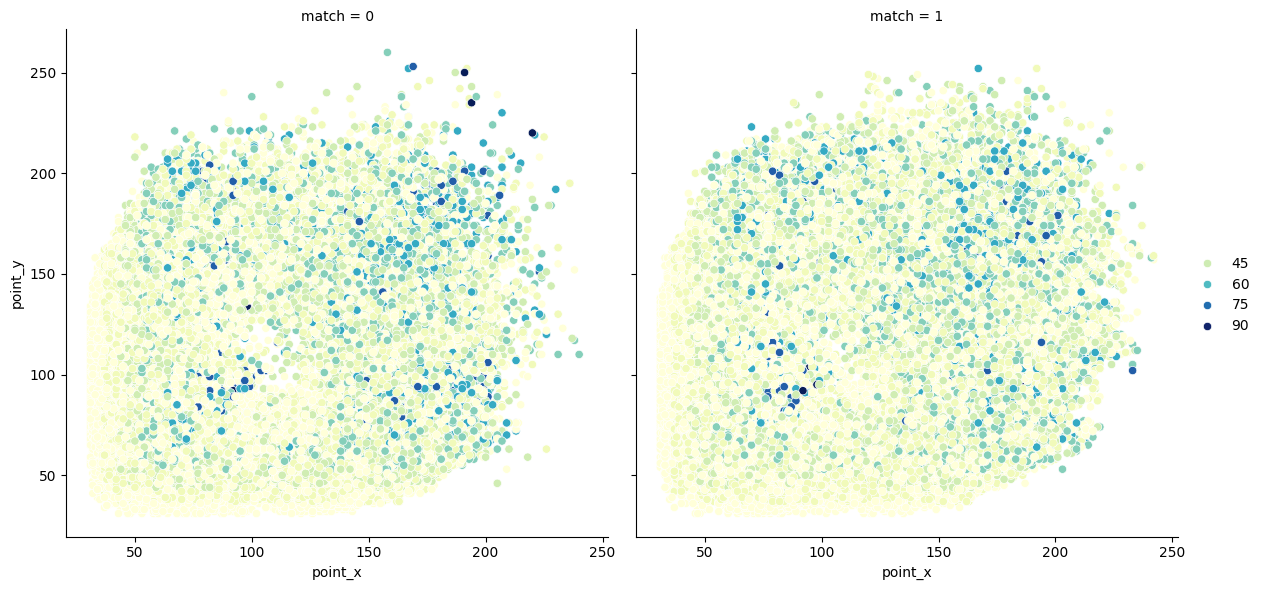

In [124]:
g = sns.FacetGrid(df_reduced, col="match", height=6, aspect=1)
g.map(sns.scatterplot, "point_x", "point_y", "size", palette="YlGnBu", sizes=(20, 200))
g.add_legend()
plt.show()

In [125]:
# Compute the correlation between 'size' and 'match'
correlation = df[['size', 'match']].corr().iloc[0, 1]
print(f"Correlation between size and match_class: {correlation:.2f}")

Correlation between size and match_class: 0.00


In [126]:
size_class_0 = df[df['match'] == 0]['size']
size_class_1 = df[df['match'] == 1]['size']

# Perform t-test
t_stat, p_value = ttest_ind(size_class_0, size_class_1, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.3f}")

T-statistic: -0.10, P-value: 0.917
